# One-dimensional maps

Computer programs are an indispensable tool in the analysis and applications of dynamical systems. In this notebook, we use Python to explore the properties of one-dimensional maps studied in class.

## Preliminaries

We import a few modules that provide useful functionality for modeling dynamical systems.

In [1]:
%matplotlib ipympl

%load_ext nb_mypy
%nb_mypy Off

Version 1.0.5


In [2]:
import matplotlib.pyplot as plt
import numpy as np 

from fractions import Fraction
from itertools import accumulate, islice, repeat, zip_longest
from ipywidgets import interact, fixed, IntSlider, FloatSlider, FloatRangeSlider
from more_itertools import take
from numpy.typing import ArrayLike
from typing import Callable, Generator, Iterable, Iterator, Sequence, Tuple, TypeVar

## Defining maps 

Let $X$ be a subset of the real line such as an interval. We model a map $f: X \to X$ as a Python function `f` with signature `f(x: X) -> X`. Here, `X` is a *type variable* that describes our computational representation of the domain $X$. For our purposes, it will be sufficient to set `X` to either a `float` (64-bit floating point number), a `Fraction` (rational number), or an `ArrayLike` type. We also introduce a type `F[X]` that represents functions from `X` to `X` (in Python, the data type for functions is `Callable`). To build `f`, we write functions that take as inputs the parameter of our model and return the dynamical map `f` as an output. Below are examples for the linear map, $f(x) = ax$, and the logistic map, $g(x) = ax(1-x)$, that we studied in class. Both of these maps have a single real parameter $a$, so our Python code takes as input a single variable `a` (of type `X`), and returns as output a function of type `F`. We also define the identity map for convenience when making cobweb plots.

Try it out yourself for the map of your choice.  

In [3]:
X = float | Fraction | ArrayLike
T = TypeVar('T')
F = Callable[[T], T]

### Dynamical maps

Within the body of each function, we define `f` using a `lambda` expression&mdash;this is Python's way of defining small anonymous functions.

In [4]:
def make_identity_map() -> F[X]:
    f = lambda x: x
    return f


def make_linear_map(a: float | Fraction) -> F[X]:
    f = lambda x: a * x
    return f


def make_logistic_map(a: float | Fraction) -> F[X]:
    f = lambda x: a * x * (1 - x)
    return f

Now that we have our dynamical maps, we can build them for different parameter values, and evaluate them at different points in $X$: 

In [5]:
idm = make_identity_map()
lin = make_linear_map(2.0)  # linear map with parameter 2 
logi = make_logistic_map(2.0)  # logistic map with parameter 2 

x = 0.5  # evaluation point

print(idm(x))
print(lin(x))
print(logi((x)))

0.5
1.0
0.5


We can also make simple plots of our maps:

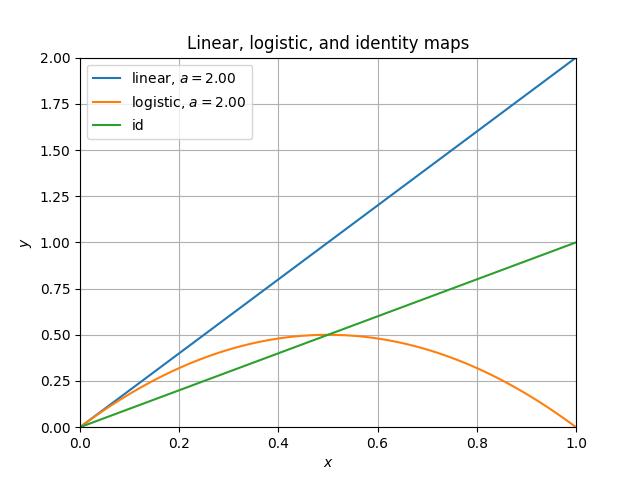

In [6]:
a_lin = 2  # parameter for linear map
a_logi = 2  # parameter for logistic map
xs = np.linspace(0.0, 1.0, num=100) # generate an equispaced grid of evaluation points in the unit interval

i_fig = 1
if plt.fignum_exists(i_fig):
    plt.close(i_fig)


def initfig_1dmaps(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_1dmaps(figspecs):
    _, ax = figspecs
    ax.plot(xs, lin(xs), label=f'linear, $a = {a_lin: .2f}$')
    ax.plot(xs, logi(xs), label=f'logistic, $a = {a_logi: .2f}$')
    ax.plot(xs, idm(xs), label='id')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 2.0)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Linear, logistic, and identity maps')
    ax.grid(True)
    ax.legend()


plotfig_1dmaps(initfig_1dmaps(i_fig))

## Iterating maps

A primary goal in dynamical systems theory is to study the properties of maps $f: X \to X$ under iteration. Defining $f^2 = f \circ f $, $f^3 = f \circ f \circ f $, $\ldots$, where $\circ$ denotes map composition (i.e., $f\circ g(x) = f(g(x))$), we are interested in characterizing the behavior of $f^k$ as $k$ increases. Python provides us with a variety of tools to build iterated sequences of functions such as `f` using `Iterator` data types. A nice property of `Iterator` types is that they allow us to encode formally infinite sequences. Such sequences are "lazy", i.e., the terms evaluated only when needed, so as long as our computer has enough memory we can generate at will any finite number of terms. 

In [7]:
def compose(f: F[X], g: F[X]) -> F[X]:
    """Composition of maps."""
    h = lambda x: f(g(x))
    return h

def iterate(f: F[X]) -> Iterator[F[X]]:
    """Iterated composition of maps."""
    itf = accumulate(repeat(f), compose, initial=make_identity_map())
    return itf

Let's explore how the first few iterations of the linear and logistic map look like.

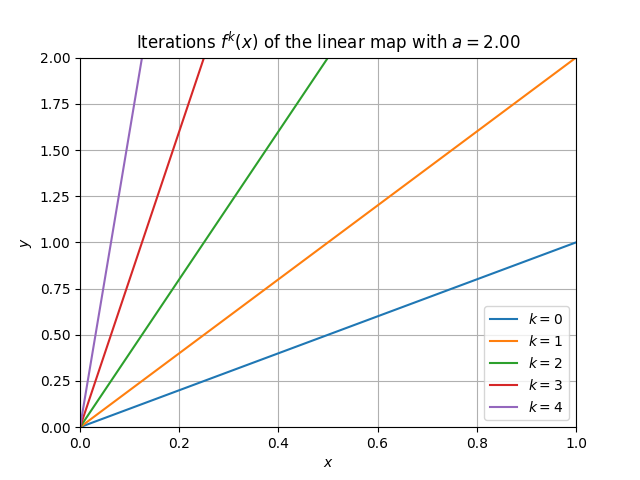

In [8]:
n_iter = 5

i_fig = 2
if plt.fignum_exists(i_fig):
    plt.close(i_fig)
    
def initfig_iter_lin(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_iter_lin(figspecs):
    _, ax = figspecs
    k = 0
    for f in take(5, iterate(lin)):
        plt.plot(xs, f(xs), label='$k = %s$' % str(k))
        k += 1 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'Iterations $f^k(x)$ of the linear map with $a = {a_lin: .2f}$')
    ax.grid(True)
    ax.legend()


plotfig_iter_lin(initfig_iter_lin(i_fig))

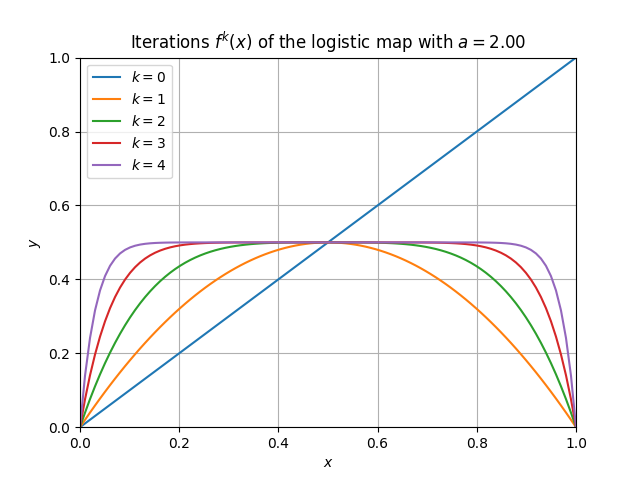

In [9]:
n_iter = 5

i_fig = 3
if plt.fignum_exists(i_fig):
    plt.close(i_fig)
    
def initfig_iter_logi(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_iter_logi(figspecs):
    _, ax = figspecs
    k = 0
    for f in take(5, iterate(logi)):
        ax.plot(xs, f(xs), label='$k = %s$' % str(k))
        k += 1 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'Iterations $f^k(x)$ of the logistic map with $a = {a_logi: .2f}$')
    ax.grid(True)
    ax.legend()


plotfig_iter_logi(initfig_iter_logi(i_fig))

## Computing orbits

Using the iterates $f^k$ we can now compute orbits of points in $X$ under the dynamics. Recall that the orbit of a point $x \in X$ under a map $f: X \to X$ is the set $O_x = \{ x, f(x), f^2(x), \ldots\}$. As in the case of the sequence $\{ \mbox{Id}, f, f^2, \ldots\}$, we represent $O_x$ as a formally infinite `Generator` object, from which we can take elements whenever we wish to access them. 

In [10]:
def orbit(x0: X, f: F[X]) -> Generator[X, None, None]:
    """Orbit of a point under iterated application of a map."""
    x = x0
    while True:
        yield x
        x = f(x)

Let's use these functions to compare the orbits of a point $x$ near 0 under the linear and logistic maps. 

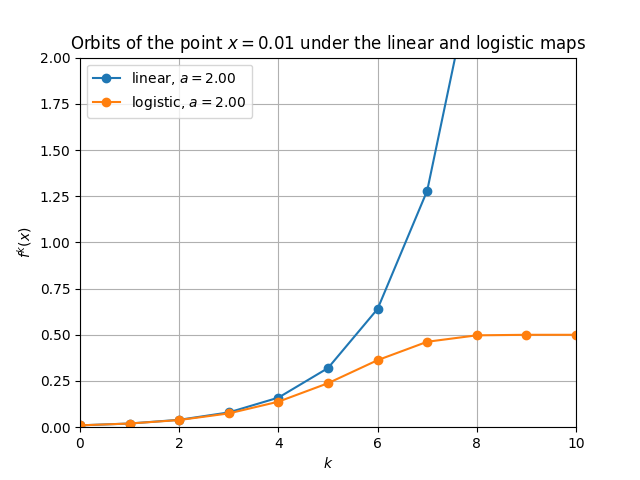

In [11]:
a = 2.0 # map parameter
x = 0.01 # initial condition
n = 11 # number of iterates

ks = range(n)

i_fig = 4
if plt.fignum_exists(i_fig):
    plt.close(i_fig)


def initfig_orbits(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_orbits(figspecs):
    _, ax = figspecs
    ax.plot(ks, take(n, orbit(x, make_linear_map(a))), 'o-',
            label=f'linear, $a = {a: .2f}$')
    ax.plot(ks, take(n, orbit(x, make_logistic_map(a))), 'o-',
            label=f'logistic, $a = {a: .2f}$')
    ax.set_xlim(0, n - 1)
    ax.set_ylim(0, 2)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$f^k(x)$')
    ax.set_title(f'Orbits of the point $x = {x: .2f}$ under the linear and logistic maps')
    ax.grid(True)
    ax.legend()


plotfig_orbits(initfig_orbits(i_fig))

## Cobweb plots

Using our computational representation of orbits, we can generate cobweb plots. The function `cobweb` computes the coordinates of the points needed to make a cobweb plot.

In [12]:
def imerge(a: Iterable[X], b: Iterable[X]) -> Iterator[X]:
    """Staggered merge of two iterables."""
    for i, j in zip_longest(a, b):
        yield i
        yield j
        
        
def cobweb(x: X, f: F[X]) -> Tuple[Iterator[X], Iterator[X]]:
    """Pair of iterators giving (x, y) coordinates for cobweb plot."""
    orb1 = orbit(x, f)
    orb2 = orbit(x, f)
    x_coords = imerge(orb1, orb2)
    orb1 = orbit(x, f)
    orb2 = islice(orbit(x, f), 1, None)
    y_coords = imerge(orb1, orb2)
    return x_coords, y_coords

Below, we make cobweb plots for the orbits of the linear and logistic map shown in the previous figure.

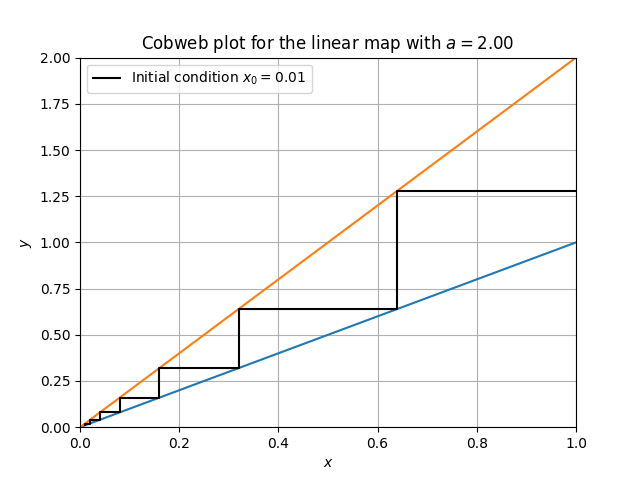

In [13]:
xs = np.linspace(0.0, 1.0, num=100) # generate an equispaced grid of evaluation points in the unit interval

# Linear map
cx, cy = cobweb(x, make_linear_map(a))
x_coords = take(2 * n, cx)
y_coords = take(2 * n, cy)

i_fig = 5
if plt.fignum_exists(i_fig):
    plt.close(i_fig)


def initfig_cobweb_lin(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_cobweb_lin(figspecs):
    _, ax = figspecs
    ax.plot(xs, xs)
    ax.plot(xs, make_linear_map(a)(xs))
    ax.plot(x_coords, y_coords,'k-',
            label=f'Initial condition $x_0 = {x: .2f}$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.grid(True)
    plt.title(f'Cobweb plot for the linear map with $a = {a: .2f}$')
    plt.legend()


plotfig_cobweb_lin(initfig_cobweb_lin(i_fig))

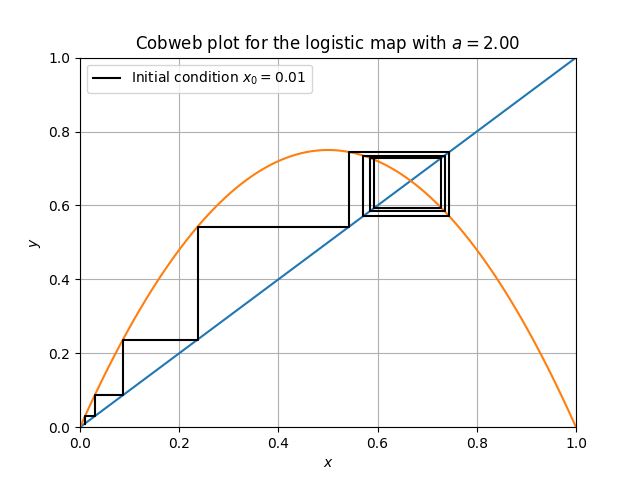

In [14]:
# Logistic map
cx, cy = cobweb(x, make_logistic_map(3))
x_coords = take(2 * n, cx)
y_coords = take(2 * n, cy)

i_fig = 6
if plt.fignum_exists(i_fig):
    plt.close(i_fig)


def initfig_cobweb_logi(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_cobweb_logi(figspecs):
    _, ax = figspecs
    ax.plot(xs, xs)
    ax.plot(xs, make_logistic_map(3)(xs))
    ax.plot(x_coords, y_coords,'k-',
            label=f'Initial condition $x_0 = {x: .2f}$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.grid(True)
    ax.set_title(f'Cobweb plot for the logistic map with $a = {a: .2f}$')
    ax.legend()


plotfig_cobweb_logi(initfig_cobweb_logi(i_fig))

# Case study: Family of logistic maps

We'll know use our code to study systematically the family of logistic maps, $g_a : \mathbb X \to \mathbb X$ with $g_a(x) = a x(1-a)$, as a function of the parameter $a$. We start by defining a few functions that will help us iteractively explore the properties of these map through graphs of $g_a$ and its iterates, orbit plots, cobweb plots, and bifurcation plots.

interactive(children=(FloatSlider(value=0.0, description='a', max=4.0, step=0.01), Output()), _dom_classes=('w…

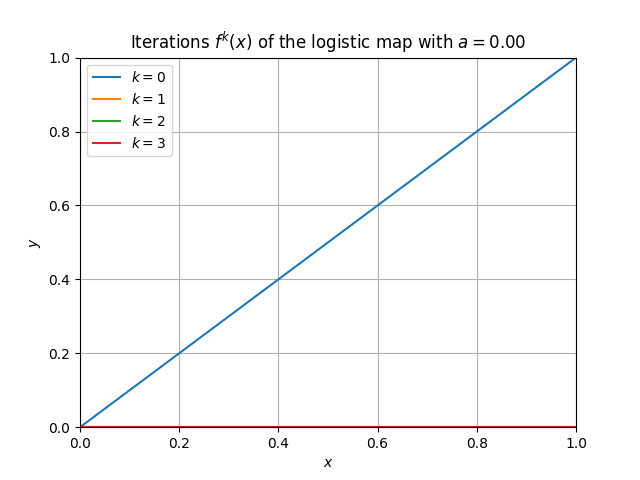

In [15]:
i_fig = 7
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_logi_a(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


slider_logi_a = FloatSlider(value=0.0, min=0.0, max=4.0, step=0.01)


@interact(a=slider_logi_a, figspecs=fixed(initfig_logi_a(i_fig))) 
def plotfig_logi_a(a: float, figspecs):
    _, ax = figspecs
    ax.cla()
    k = 0
    for f in take(4, iterate(make_logistic_map(a))):
        ax.plot(xs, f(xs), label='$k = %s$' % str(k))
        k += 1 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'Iterations $f^k(x)$ of the logistic map with $a = {a: .2f}$')
    ax.grid(True)
    ax.legend()

interactive(children=(FloatSlider(value=2.0, description='a', max=4.0, step=0.01), FloatSlider(value=0.05, des…

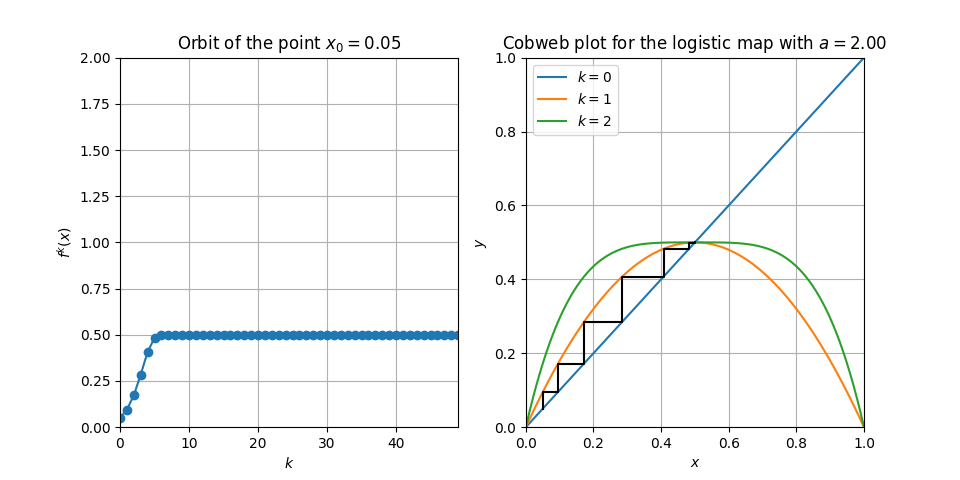

In [26]:
i_fig = 8
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_logi_orbit_cobweb_a(i):
    fig = plt.figure(num=i_fig, figsize=plt.figaspect(0.5))
    axs = [fig.add_subplot(1, 2, i + 1) for i in range(2)]
    return (fig, axs)


slider_logi_orbit_cobweb_a = FloatSlider(value=2.0, min=0.0, max=4.0, step=0.01)
slider_logi_orbit_cobweb_x = FloatSlider(value=0.05, min=0.0, max=1.0, step=0.01)


@interact(a=slider_logi_orbit_cobweb_a, x=slider_logi_orbit_cobweb_x,
          figspecs=fixed(initfig_logi_orbit_cobweb_a(i_fig))) 
def plotfig_logi_orbit_cobweb_a(a: float, x: X, figspecs):
    n = 50
    f = make_logistic_map(a)
    cx, cy = cobweb(x, f)
    x_coords = take(2 * n, cx)
    y_coords = take(2 * n, cy)
    
    _, axs = figspecs
    [ax.cla() for ax in axs]
    
    axs[0].plot(range(n), take(n, orbit(x, f)), 'o-')
    axs[0].set_xlim(0, n - 1)
    axs[0].set_ylim(0, 2)
    axs[0].set_xlabel('$k$')
    axs[0].set_ylabel('$f^k(x)$')
    axs[0].set_title(f'Orbit of the point $x_0 = {x: .2f}$')
    axs[0].grid(True)

    k = 0
    for fk in take(3, iterate(f)):
        axs[1].plot(xs, fk(xs), label=f'$k = {k}$')
        k += 1 
    axs[1].plot(x_coords, y_coords,'k-')
    axs[1].set_xlim(0.0, 1.0)
    axs[1].set_ylim(0.0, 1.0)
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].grid(True)
    axs[1].set_title(f'Cobweb plot for the logistic map with $a = {a: .2f}$')
    axs[1].legend()

interactive(children=(FloatRangeSlider(value=(0.0, 4.0), continuous_update=False, description='a_lim', max=4.0…

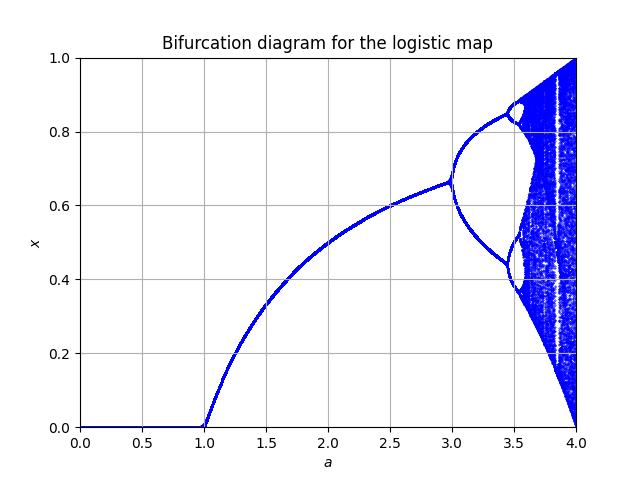

In [17]:
i_fig = 9

if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_logi_bif(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


slider_logi_bif = FloatRangeSlider(value=[0.0, 4.0], min=0.0, max=4.0, step=0.01,
                                   continuous_update=False)


@interact(a_lim=slider_logi_bif, figspecs=fixed(initfig_logi_bif(i_fig))) 
def plot_logi_bif(a_lim: tuple[float, float], figspecs):
    """Bifurcation diagram for the logistic map
    
    :a_lim: Tuple containing lower and upper parameter values
    
    """
    n_a = 1000
    n_start = 101
    n_end = 300
    x = 1.0 / np.sqrt(3.0)
    a = np.linspace(a_lim[0], a_lim[1], num=n_a) # generate an equispaced grid of evaluation points
    orb = orbit(x, make_logistic_map(a))
    
    _, ax = figspecs
    ax.cla()
    
    for xs in islice(orb, n_start, n_end):
        ax.scatter(a, xs, s=0.5, c='b', marker='.' )
        
    ax.set_xlim(a_lim[0], a_lim[1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('$a$')
    ax.set_ylabel('$x$')
    ax.grid(True)
    ax.set_title('Bifurcation diagram for the logistic map')

## Tripling map on the unit interval

The \emph{tripling map} is a typical example of an expanding map on the unit interval with chaotic dynamics. It is defined as $f: [0,1) \to [0,1) $ with $f(x) = 3x \mod 1$. We use the tripling map as an example to study \emph{eventually periodic points} and sensitive \emph{dependence on initial conditions}.

In [18]:
def make_tripling_map() -> F[X]:
    f = lambda x: 3 * x % 1
    return f

We begin by plotting the first few iterates of the tripling map. Notice that at iteration $k$ we create a three-fold copy of the graph at iteration $k-1$. Observe also that the complexity of the graphs rapidly increases with $k$. This is a manifestation of the fact that the tripling map exhibits sensitive dependence on initial conditions; that is, due to the highly oscillatory nature of $f^k$ at large $k$, two nearby points $x$ and $y$ may have drastically different values $f^k(x)$ and $f^k(y)$.

interactive(children=(IntSlider(value=0, description='k', max=4), Output()), _dom_classes=('widget-interact',)…

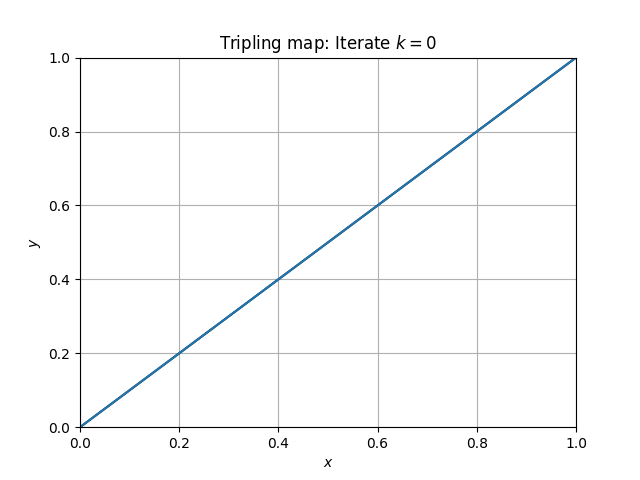

In [19]:
i_fig = 10
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_tripling(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


slider_tripling = IntSlider(value=0, min=0, max=4)


@interact(k=slider_tripling, figspecs=fixed(initfig_tripling(i_fig))) 
def plot_tripling(k: int, figspecs):
    _, ax = figspecs
    ax.cla()
    
    xs = np.linspace(0.0, 1.0, num=1000) # generate an equispaced grid of evaluation points in the unit interval
    ax.plot(xs, xs, 'k-')
    
    for f in islice(iterate(make_tripling_map()), k, k + 1):
        ax.plot(xs, f(xs))
        
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Tripling map: Iterate $k = %s$' % str(k))
    ax.grid(True)

Next, we plot orbits of different points $x$ under the map. Notice that aside from special cases (e.g., the fixed point $x=0$) the orbits have an aperiodic, chaotic-lookinig behavior.

interactive(children=(FloatSlider(value=0.7071067811865476, description='x', max=1.0, step=0.01), Output()), _…

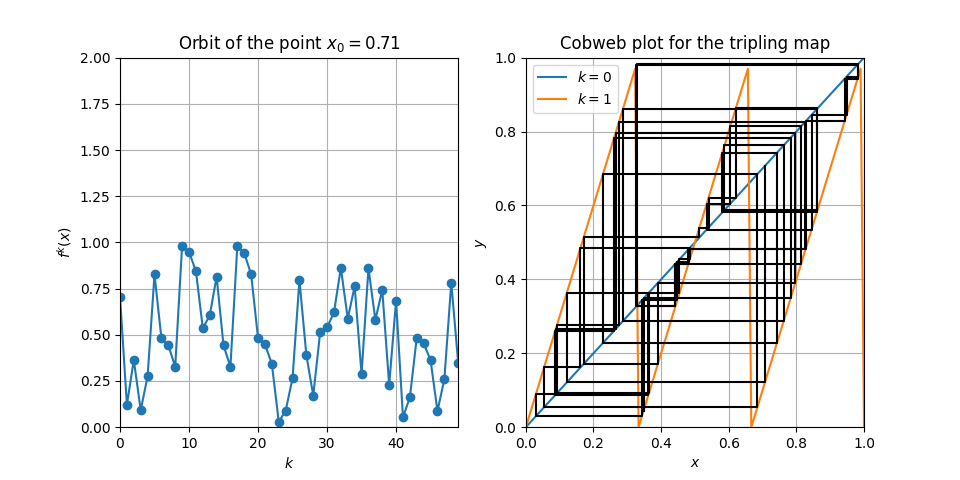

In [28]:
i_fig = 11
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_tripling_orbit_cobweb(i):
    fig = plt.figure(num=i_fig, figsize=plt.figaspect(0.5))
    axs = [fig.add_subplot(1, 2, i + 1) for i in range(2)]
    return (fig, axs)


slider_tripling_orbit_cobweb_x = FloatSlider(value=np.sqrt(0.5),
                                             min=0.0, max=1.0, step=0.01)


@interact(x=slider_tripling_orbit_cobweb_x,
          figspecs=fixed(initfig_tripling_orbit_cobweb(i_fig))) 
def plotfig_tripling_orbit_cobweb(x: X, figspecs):
    n = 50
    f = make_tripling_map()
    cx, cy = cobweb(x, f)
    x_coords = take(2 * n, cx)
    y_coords = take(2 * n, cy)
    
    _, axs = figspecs
    [ax.cla() for ax in axs]
    
    axs[0].plot(range(n), take(n, orbit(x, f)), 'o-')
    axs[0].set_xlim(0, n - 1)
    axs[0].set_ylim(0, 2)
    axs[0].set_xlabel('$k$')
    axs[0].set_ylabel('$f^k(x)$')
    axs[0].set_title(f'Orbit of the point $x_0 = {x: .2f}$')
    axs[0].grid(True)

    k = 0
    for fk in take(2, iterate(f)):
        axs[1].plot(xs, fk(xs), label=f'$k = {k}$')
        k += 1 
    axs[1].plot(x_coords, y_coords,'k-')
    axs[1].set_xlim(0.0, 1.0)
    axs[1].set_ylim(0.0, 1.0)
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].grid(True)
    axs[1].set_title('Cobweb plot for the tripling map')
    axs[1].legend()

We now study the behavior of periodic points and eventually periodic points under the tripling map. In class, we saw that the fixed points of $f^k$ are given by $x_{k,j} := j / (3^k - 1)$ for $k \in \mathbb N$ and $j=0,1,\ldots, k-1$. Thus, the period-$k$ points are subsets of $x_{k,j}$. We also saw that $x \in [0,1) $ is eventually periodic under $f$ if and only if it is rational. In order to prevent roundoff errors due to floating-point arithmetic, we perform our computations for periodic and eventually periodic points using `Fraction` data types which implement rational arithmetic.

In [29]:
def initfig_tripling_orbit_cobweb_fraction(i):
    fig = plt.figure(num=i_fig, figsize=plt.figaspect(0.5))
    axs = [fig.add_subplot(1, 2, i + 1) for i in range(2)]
    return (fig, axs)

def plotfig_tripling_orbit_cobweb_fraction(p: int, q: int, figspecs):
    n = 100
    f = make_tripling_map()
    x = Fraction(p, q)
    cx, cy = cobweb(x, f)
    x_coords = take(2 * n, cx)
    y_coords = take(2 * n, cy)
    
    _, axs = figspecs
    [ax.cla() for ax in axs]

    axs[0].plot(range(n), take(n, orbit(x, f)), 'o-')
    axs[0].set_xlim(0, n - 1)
    axs[0].set_ylim(0, 2)
    axs[0].set_xlabel('$k$')
    axs[0].set_ylabel('$f^k(x)$')
    axs[0].set_title(f'Orbit of the point $x_0 = {x}$')
    axs[0].grid(True)

    k = 0
    for fk in take(2, iterate(f)):
        axs[1].plot(xs, fk(xs), label=f'$k = {k}$')
        k += 1 
    axs[1].plot(x_coords, y_coords,'k-')
    axs[1].set_xlim(0.0, 1.0)
    axs[1].set_ylim(0.0, 1.0)
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y$')
    axs[1].grid(True)
    axs[1].set_title('Cobweb plot for the tripling map')
    axs[1].legend()

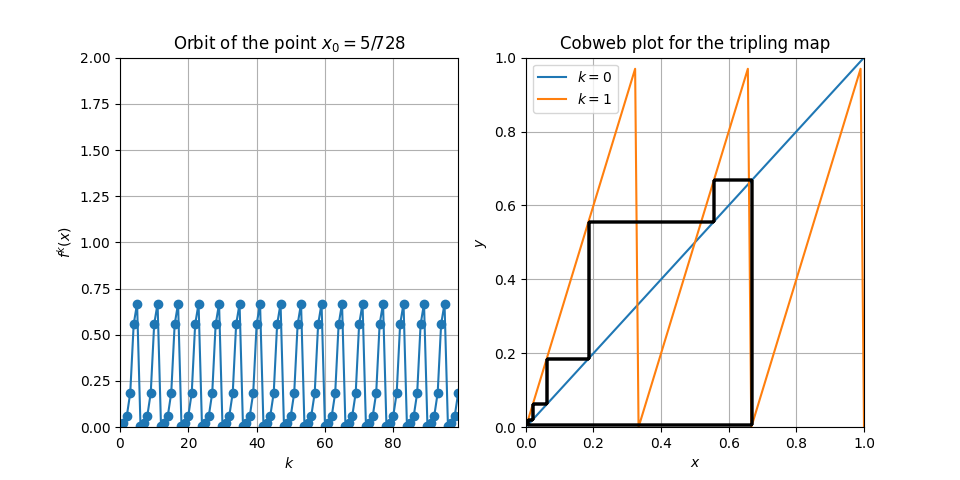

In [30]:
k = 6
j = 5
x0 = Fraction(j,3 ** k - 1)

i_fig = 12
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

plotfig_tripling_orbit_cobweb_fraction(j, 3**k -1, 
                                       initfig_tripling_orbit_cobweb_fraction(i_fig))

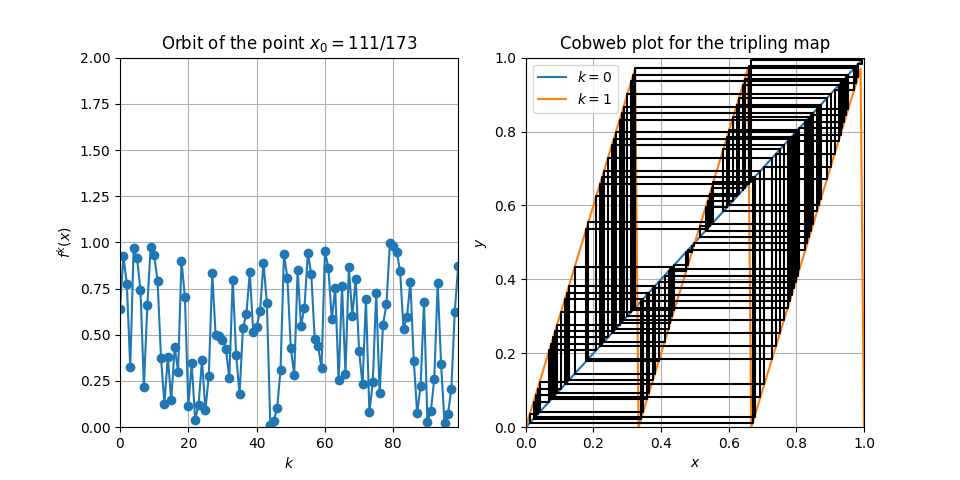

In [31]:
p = 111
q = 173

i_fig = 12
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

plotfig_tripling_orbit_cobweb_fraction(p, q, 
                                       initfig_tripling_orbit_cobweb_fraction(i_fig))

Finally, to illustrate sensitive dependence on initial conditions under the tripling map, we compare an orbit starting from a rational number $x$ with the orbit starting from the `float` representation of that number. Roughly speaking, we can think of this example as perturbing the initial condition $x$ to $x+\epsilon$ where the magnitude of $\epsilon$ is equal to the representation error (precision) of `float`s. In Python, `float`s conform with IEEE-754 double precision, which means they provide 53 bits precision. This is approximately equivalent to 16 decimal digits of precision, i.e., the approximate magnitude of $\epsilon$ is $10^{-16}$. One has to remember that floating point errors keep accruing under each iteration (so the numerical orbit in floating point arithmetic is not a true orbit of the tripling map), but the plot below shows that due to sensitive dependence on initial conditions, even tiny perturbations cause orbits to eventually diverge from one another.

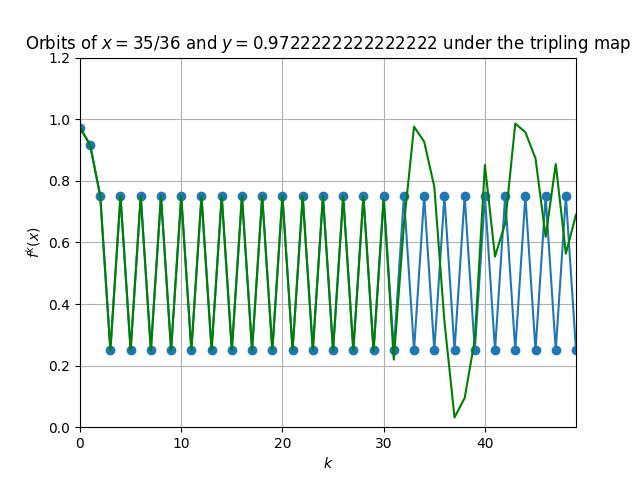

In [32]:
x0 = Fraction(35, 36)
y0 = float(x0)

i_fig = 12
if plt.fignum_exists(i_fig):
    plt.close(i_fig)

    
def initfig_tripling_orbits(i):
    fig, ax = plt.subplots(num=i_fig)
    return (fig, ax)


def plotfig_tripling_orbits(x: X, y: X, figspecs):
    _, ax = figspecs
    """Time series plots of a pair of orbits under the tripling map (to 
    illustrate sensitive dependence on initial conditions).
    
    :x: Initial condition for first orbit.
    :y: Initial condition for second orbit.
    """
    n = 50 
    ks = range(n)
    ax.cla()
    ax.plot(ks, take(n, orbit(x, make_tripling_map())), 'o-')
    ax.plot(ks, take(n, orbit(y, make_tripling_map())), 'g-')
    ax.set_xlim(0, n - 1)
    ax.set_ylim(0.0, 1.2)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$f^k(x)$')
    ax.set_title(f'Orbits of $x = {x}$ and $y = {y}$ under the tripling map')
    ax.grid(True)


plotfig_tripling_orbits(x0, y0, initfig_tripling_orbits(i_fig))